### Подключение модулей

In [1]:
import pandas as pd # type:ignore
import numpy as np
import matplotlib.pyplot as plt # type:ignore
import seaborn as sns # type:ignore
from sklearn.preprocessing import MinMaxScaler # type:ignore
from sklearn.decomposition import PCA # type:ignore
import plotly.express as px # type:ignore
from sklearn.manifold import TSNE # type:ignore
from sklearn.metrics import accuracy_score, rand_score # type:ignore
from sklearn.preprocessing import StandardScaler # type:ignore
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN # type:ignore
import scipy.cluster.hierarchy as sch # type:ignore


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Загрузка данных

In [2]:
df = pd.read_csv('pokemon.csv')

In [3]:
df.drop_duplicates() # Удаляем дубликаты

,Name,Total,HP,Attack,Defence,Sp_attack,Sp_defence,Speed
0,Bulbasaur,318,45,49,49,65,65,45
1,Ivysaur,405,60,62,63,80,80,60
2,Venusaur,525,80,82,83,100,100,80
3,Mega Venusaur,625,80,100,123,122,120,80
4,Charmander,309,39,52,43,60,50,65
...,...,...,...,...,...,...,...,...
1040,Glastrier,580,100,145,130,65,110,30
1041,Spectrier,580,100,65,60,145,80,130
1042,Calyrex,500,100,80,80,80,80,80
1043,Mega Calyrex,680,100,165,150,85,130,50


In [4]:
X = df.iloc[:, [3, 4]].values
y = df.iloc[:, 0]

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<h1 id="aa" style="color:black;background:#ffcc01;padding:8px;border-radius:8px;"> Моделирование </h1>

# K-Means

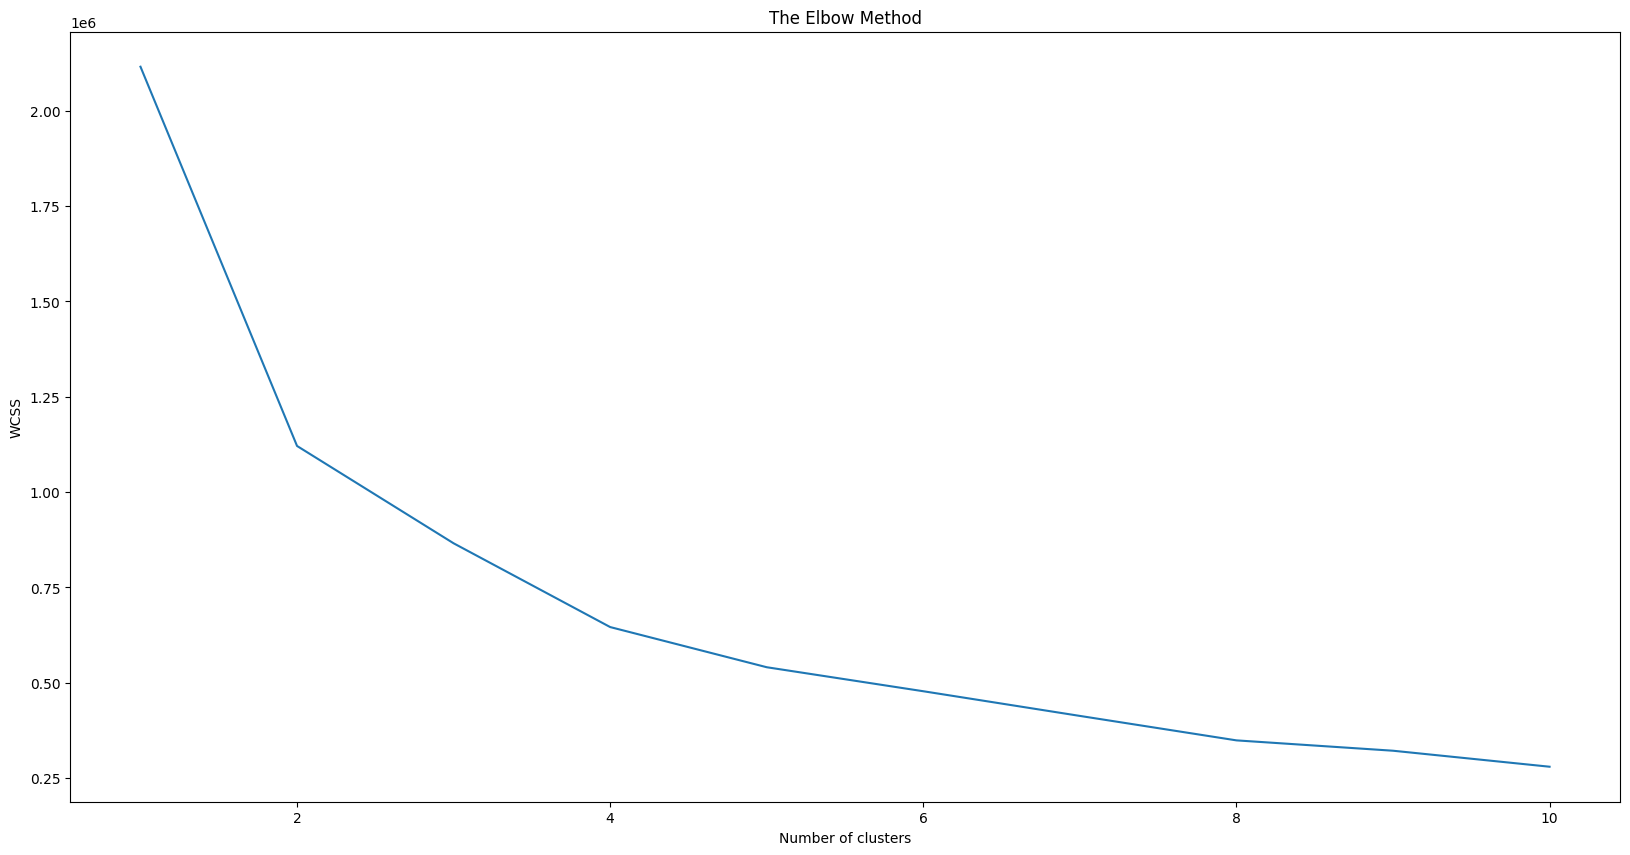

In [6]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(20,10))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [7]:
num_clusters = 2

In [8]:
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)

In [9]:
kmeans.fit(X)

KMeans(n_clusters=2, n_init=10)

In [10]:
pred=kmeans.fit_predict(X)

In [11]:
pred

array([1, 1, 0, ..., 1, 0, 0], dtype=int32)

In [12]:
labels=kmeans.labels_
print(labels)

[1 1 0 ... 1 0 0]


In [13]:
df['cluster'] = pd.Series(labels)

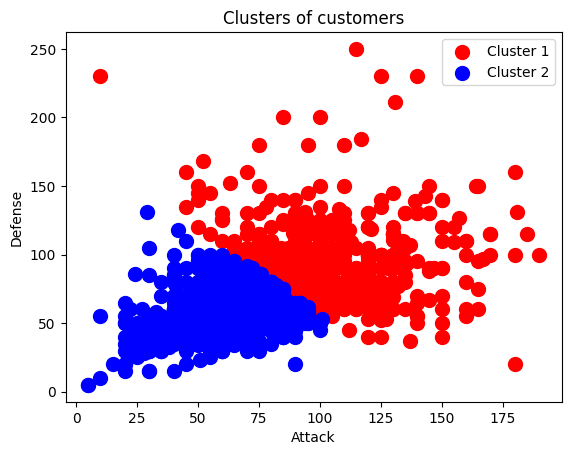

In [14]:
plt.scatter(X[pred == 0, 0], X[pred == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.title('Clusters of customers')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.legend()
plt.show()

# Agglomerative Clustering by Ward

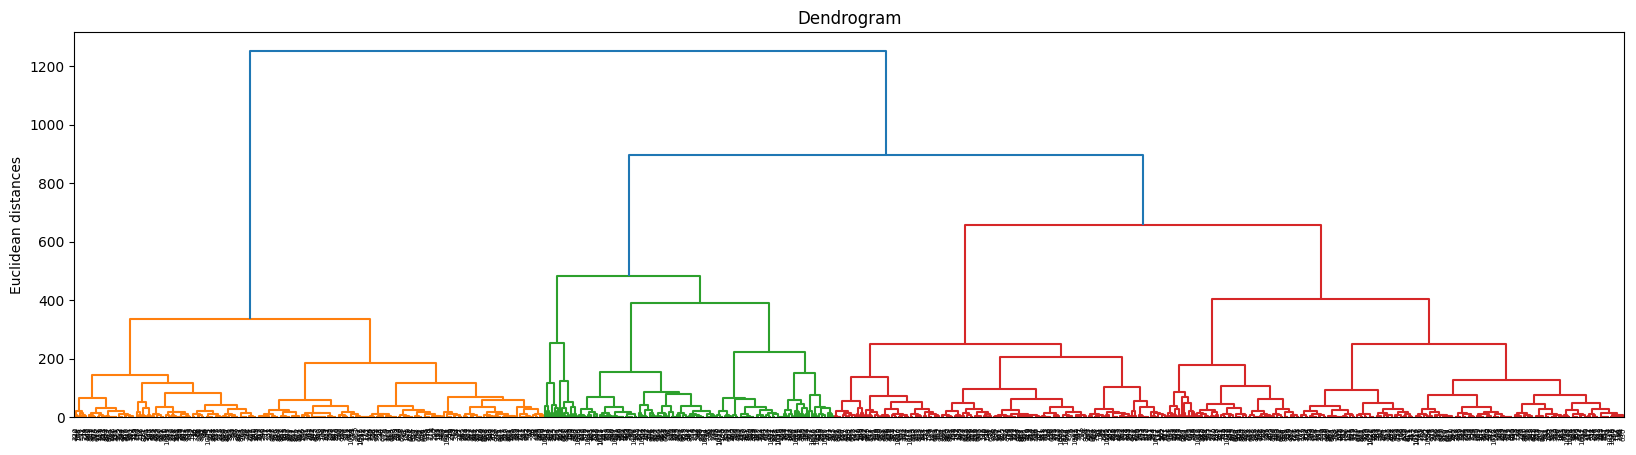

In [15]:
plt.figure(figsize=(20, 5))
# dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'), color_threshold = 3.9)
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.show()

In [16]:
clustering_ward = AgglomerativeClustering(n_clusters=2, linkage='ward').fit(X)
pred_ward = clustering_ward.labels_

# DBSCAN

In [17]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_scaled)
labels = dbscan.labels_

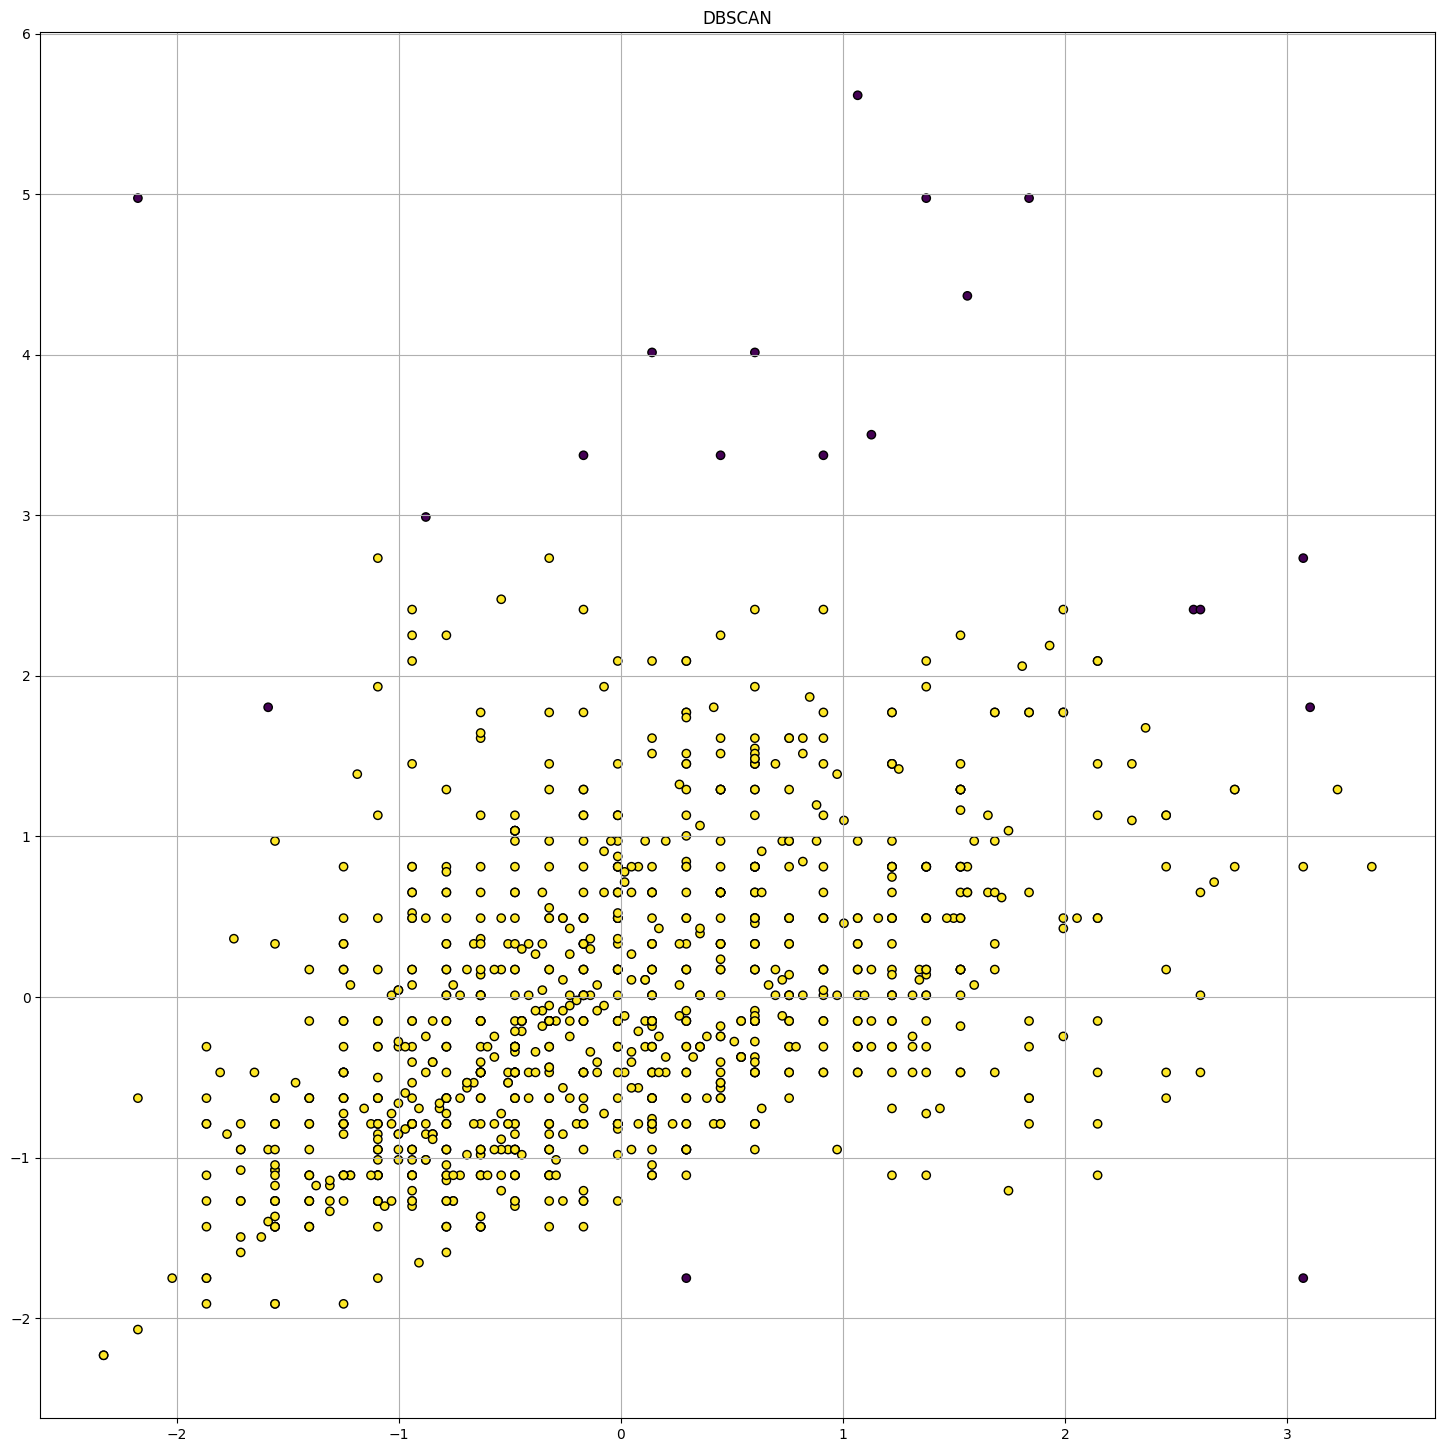

In [18]:
plt.figure(figsize=(18, 18))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', edgecolor='k')
plt.title('DBSCAN')
plt.grid(True)
plt.show()

<h1 id="aa" style="color:black;background:#ffcc01;padding:8px;border-radius:8px;"> Сравнение реальных и предсказанных кластеров </h1>

In [19]:
rs_k = rand_score(kmeans.labels_, y) 
rs_ward = rand_score(pred_ward, y)

print('\nK-Means')
print('_'*45 + '\n')
print(" rand_score = {} \n\n {} из 1045 предсказано верно \n\n\n\n".format(rs_k, rs_k * 1045))


print('Agglomerative Clustering')
print('_'*45 + '\n')
print(" rand_score = {} \n\n {} из 1045 предсказано верно \n\n\n\n".format(rs_ward, rs_ward * 1045))


K-Means
_____________________________________________

 rand_score = 0.4919008597774478 

 514.036398467433 из 1045 предсказано верно 




Agglomerative Clustering
_____________________________________________

 rand_score = 0.4230856660983703 

 442.12452107279694 из 1045 предсказано верно 




